<a href="https://colab.research.google.com/github/ynlare/Python-For-Data-Engineering-Project/blob/main/Data_Engineering_Project_(General_Electric_Digital_Technology_Data_Analytics_Program)_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics in the Aviation Industry

# Understand your flight data

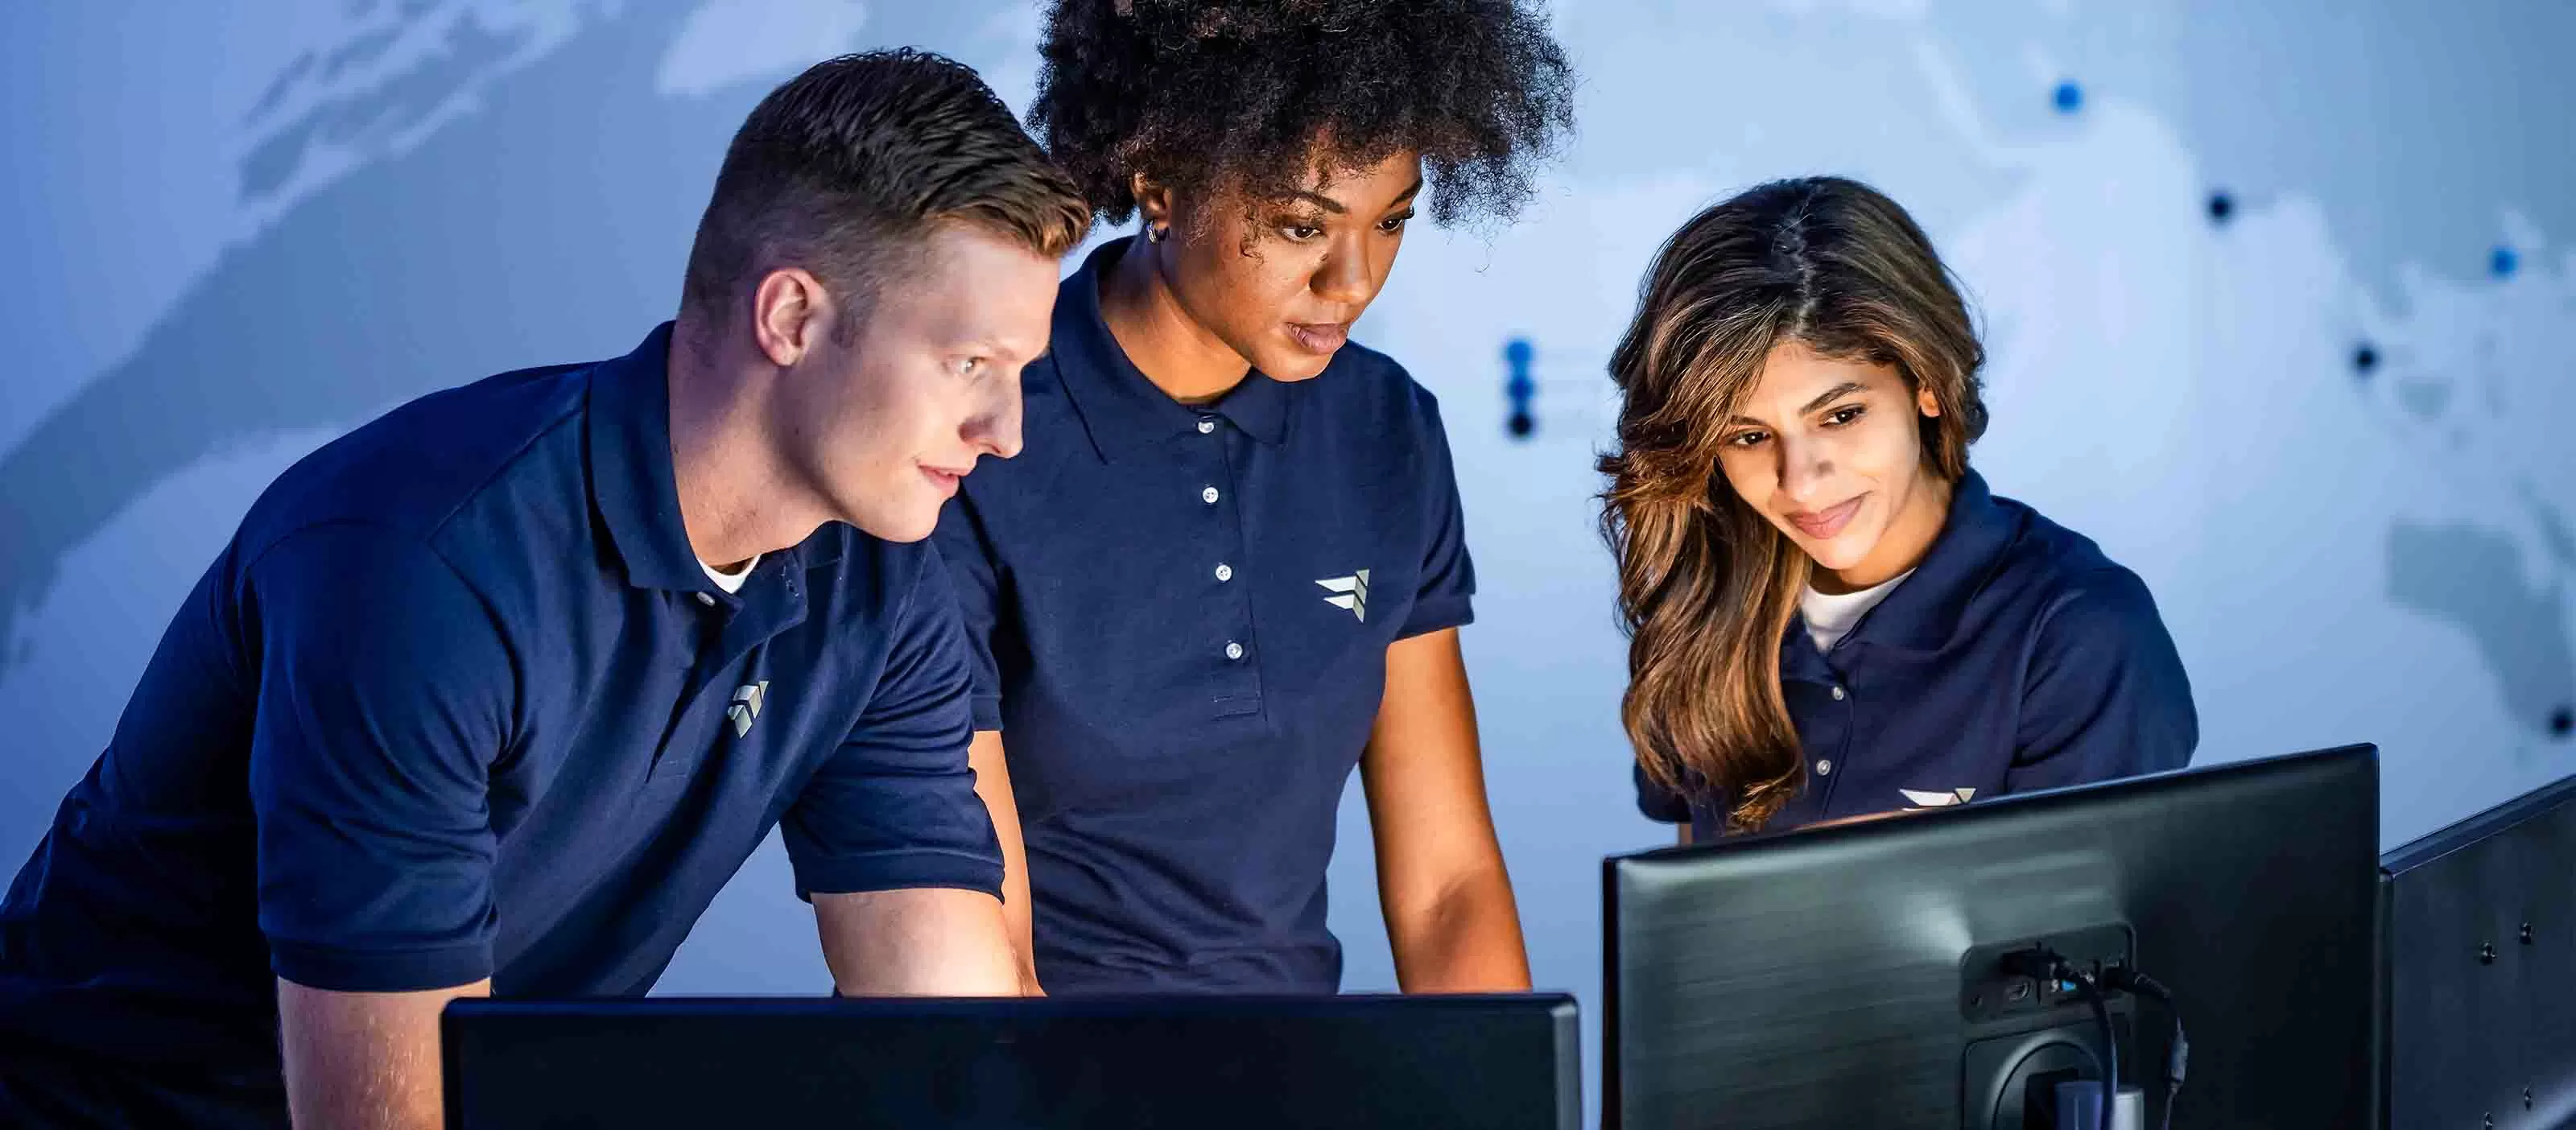

In [54]:
display.Image('/content/drive/MyDrive/Data_Engineering/Flight-analytics-from-ge-digital-3200x1404.jpg', width = 1200, height = 500)

# Data Engineering

Using data engineering to combine full-flight engine data, part manufacturing data, airport location data to create a data lake our analysts can use

# Postgres/SQL | Data orchestration & transformation | Critical Thinking


In [55]:
import pandas as pd 
import numpy as np
#import gspread as gs
import matplotlib.pyplot as plt 
from IPython import display
import matplotlib.colors as mcolors
import folium
import json


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# /content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1) (2).xlsx
df_engine_axm = pd.read_excel('/content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1) (2).xlsx', sheet_name='av_engine_data_axm_psql')  

In [63]:
df_engine_axm

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,...,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32
0,test_FD001,999126,26,1,2017-12-31 18:33:07,AXM,VTBD,VTUV,-0.0027,0.0006,...,522.55,2387.98,8147.17,8.3468,0.03,392,2388,100,38.82,23.3876
1,test_FD001,999126,26,2,2017-12-31 19:59:49,AXM,VTUV,VTBD,-0.0029,0.0002,...,521.85,2388.01,8146.58,8.4159,0.03,390,2388,100,39.00,23.3793
2,test_FD001,999126,26,3,2017-12-31 21:44:38,AXM,VTBD,VMMC,0.0008,0.0001,...,522.34,2388.05,8144.60,8.4444,0.03,391,2388,100,39.20,23.3390
3,test_FD001,999126,26,4,2018-01-01 00:50:02,AXM,VMMC,VTBD,-0.0026,0.0005,...,522.03,2388.00,8147.98,8.3986,0.03,392,2388,100,38.97,23.3931
4,test_FD001,999126,26,5,2018-01-01 04:25:32,AXM,VTBD,VTSP,0.0020,0.0005,...,522.04,2388.00,8142.07,8.4332,0.03,391,2388,100,39.11,23.3904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21183,train_FD001,999096,96,264,2018-02-13 22:32:30,AXM,WMKK,VDSV,-0.0034,0.0005,...,519.47,2388.25,8142.08,8.5109,0.03,395,2388,100,38.53,23.0965
21184,train_FD001,999096,96,265,2018-02-14 00:48:00,AXM,VDSV,WMKK,0.0015,0.0004,...,519.49,2388.20,8140.98,8.5158,0.03,396,2388,100,38.30,23.0309
21185,train_FD001,999096,96,266,2018-02-14 02:06:00,AXM,WMKK,WBKL,-0.0028,-0.0002,...,519.48,2388.27,8145.65,8.5165,0.03,395,2388,100,38.63,23.1059
21186,train_FD001,999096,96,267,2018-02-14 03:23:32,AXM,WMKK,WBKL,0.0001,0.0005,...,519.61,2388.25,8143.74,8.5615,0.03,396,2388,100,38.51,23.0118


In [64]:
df_engine_fron = pd.read_excel('/content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1) (2).xlsx',
sheet_name='av_engine_data_fron_psql') 

In [65]:
df_engine_fron

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,...,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32
0,train_FD001,999050,50,1,2018-01-06 06:01:09,FRON,KMCO,KMSY,-0.0029,-0.0002,...,521.68,2388.06,8151.49,8.4158,0.03,393,2388,100,38.80,23.3016
1,train_FD001,999050,50,2,2018-01-06 07:41:00,FRON,KMSY,KSAT,-0.0002,-0.0005,...,522.12,2388.07,8142.72,8.4467,0.03,392,2388,100,38.99,23.3440
2,train_FD001,999050,50,3,2018-01-06 08:41:18,FRON,KMSY,KSAT,-0.0010,-0.0005,...,521.96,2388.05,8139.14,8.4424,0.03,393,2388,100,38.91,23.3190
3,train_FD001,999050,50,4,2018-01-06 10:14:00,FRON,KSAT,KSAN,-0.0061,-0.0002,...,522.31,2388.04,8145.16,8.4504,0.03,393,2388,100,38.95,23.3161
4,train_FD001,999050,50,5,2018-01-06 11:12:52,FRON,KSAT,KSAN,-0.0002,0.0001,...,522.05,2388.05,8145.35,8.3822,0.03,392,2388,100,38.83,23.3256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,train_FD001,999086,86,271,2018-02-08 08:24:59,FRON,KMIA,KLAS,-0.0017,0.0000,...,519.80,2388.22,8153.15,8.5043,0.03,396,2388,100,38.47,23.0271
7286,train_FD001,999086,86,272,2018-02-08 13:16:00,FRON,KLAS,KIND,0.0002,-0.0004,...,519.62,2388.23,8153.33,8.4910,0.03,396,2388,100,38.52,23.0738
7287,train_FD001,999086,86,273,2018-02-08 14:16:02,FRON,KLAS,KIND,0.0017,0.0002,...,519.51,2388.21,8150.99,8.5339,0.03,396,2388,100,38.45,23.1261
7288,train_FD001,999086,86,274,2018-02-08 18:21:45,FRON,KIND,KMCO,0.0003,0.0003,...,519.13,2388.25,8157.08,8.5220,0.03,396,2388,100,38.49,23.0981


In [66]:
df_engine_aic = pd.read_excel('/content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1) (2).xlsx',
sheet_name='av_engine_data_aic_psql') 

In [67]:
df_engine_aic

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,...,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32
0,train_FD001,999001,1,1,2018-01-11 17:10:56,AIC,VTBS,VICG,-0.0005,0.0002,...,521.93,2388.12,8130.36,8.4279,0.03,392,2388,100,38.86,23.4513
1,train_FD001,999001,1,2,2018-01-12 01:07:00,AIC,VICG,VTBS,0.0016,-0.0003,...,521.72,2388.09,8134.28,8.4230,0.03,391,2388,100,38.80,23.3881
2,train_FD001,999001,1,3,2018-01-12 02:06:59,AIC,VICG,VTBS,-0.0017,0.0001,...,521.97,2388.09,8133.95,8.3951,0.03,391,2388,100,38.84,23.3085
3,train_FD001,999001,1,4,2018-01-12 07:42:00,AIC,VTBS,VIDP,-0.0012,-0.0002,...,522.04,2388.10,8129.85,8.4040,0.03,391,2388,100,39.03,23.3975
4,train_FD001,999001,1,5,2018-01-12 08:42:17,AIC,VTBS,VIDP,0.0027,0.0001,...,522.25,2387.97,8132.67,8.4135,0.03,392,2388,100,38.80,23.3820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,train_FD001,999069,69,330,2018-02-17 19:08:17,AIC,VIDP,VOMM,0.0040,-0.0002,...,520.31,2388.26,8129.59,8.5460,0.03,397,2388,100,38.53,23.0549
5816,train_FD001,999069,69,331,2018-02-17 22:41:34,AIC,VOMM,VIDP,0.0013,0.0003,...,519.86,2388.27,8131.20,8.5116,0.03,396,2388,100,38.28,23.0610
5817,train_FD001,999069,69,332,2018-02-18 04:41:00,AIC,VIDP,VECC,0.0004,-0.0001,...,518.69,2388.26,8126.63,8.5059,0.03,396,2388,100,38.47,23.0422
5818,train_FD001,999069,69,333,2018-02-18 05:41:31,AIC,VIDP,VECC,0.0016,-0.0002,...,520.48,2388.32,8132.97,8.5270,0.03,396,2388,100,38.52,23.1208


In [68]:
df_engine_pgt = pd.read_excel('/content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1) (2).xlsx',
sheet_name='av_engine_data_pgt_psql') 

In [69]:
df_engine_pgt

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,...,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32
0,train_FD001,999056,56,1,2018-01-01 06:33:13,PGT,LTBJ,LTCR,0.0012,-0.0004,...,521.18,2388.13,8136.92,8.4412,0.03,395,2388,100,38.81,23.2391
1,train_FD001,999056,56,2,2018-01-01 09:40:21,PGT,LTCR,LTBJ,0.0012,-0.0004,...,520.82,2388.08,8133.11,8.4461,0.03,394,2388,100,38.82,23.3340
2,train_FD001,999056,56,3,2018-01-01 12:23:01,PGT,LTBJ,LTFJ,0.0026,0.0005,...,521.70,2388.12,8136.86,8.4357,0.03,394,2388,100,38.89,23.2844
3,train_FD001,999056,56,4,2018-01-01 14:11:10,PGT,LTFJ,LTCG,0.0034,-0.0002,...,522.06,2388.18,8132.53,8.4411,0.03,394,2388,100,38.79,23.3204
4,train_FD001,999056,56,5,2018-01-01 21:10:50,PGT,LTCG,LTFJ,0.0024,-0.0001,...,521.36,2388.16,8133.47,8.4824,0.03,394,2388,100,39.00,23.3592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,train_FD001,999084,84,257,2018-06-06 08:22:54,PGT,LFSB,LTFJ,-0.0027,0.0000,...,519.66,2388.20,8148.87,8.5464,0.03,397,2388,100,38.49,22.9996
6296,train_FD001,999084,84,258,2018-06-06 12:01:39,PGT,LTFJ,LTAJ,0.0026,0.0001,...,520.00,2388.18,8148.76,8.5113,0.03,396,2388,100,38.49,23.0383
6297,train_FD001,999084,84,259,2018-06-06 14:01:52,PGT,LTAJ,LTFJ,-0.0013,0.0000,...,519.74,2388.20,8146.22,8.5336,0.03,395,2388,100,38.36,23.0022
6298,train_FD001,999084,84,260,2018-06-06 18:41:30,PGT,OKBK,LTFJ,-0.0023,0.0001,...,519.77,2388.23,8149.66,8.5367,0.03,396,2388,100,38.49,23.1018


In [70]:
# provide list of dataframes 
df_engine_concat = pd.concat([df_engine_axm,df_engine_fron,df_engine_aic,df_engine_pgt])

In [71]:
df_engine_concat

,dataset,esn,unit,flight_cycle,datetime,operator,depart_icao,destination_icao,hpc_eff_mod,hpc_flow_mod,...,phi,nrf,nrc,bpr,farb,htbleed,nf_dmd,pcnfr_dmd,w31,w32
0,test_FD001,999126,26,1,2017-12-31 18:33:07,AXM,VTBD,VTUV,-0.0027,0.0006,...,522.55,2387.98,8147.17,8.3468,0.03,392,2388,100,38.82,23.3876
1,test_FD001,999126,26,2,2017-12-31 19:59:49,AXM,VTUV,VTBD,-0.0029,0.0002,...,521.85,2388.01,8146.58,8.4159,0.03,390,2388,100,39.00,23.3793
2,test_FD001,999126,26,3,2017-12-31 21:44:38,AXM,VTBD,VMMC,0.0008,0.0001,...,522.34,2388.05,8144.60,8.4444,0.03,391,2388,100,39.20,23.3390
3,test_FD001,999126,26,4,2018-01-01 00:50:02,AXM,VMMC,VTBD,-0.0026,0.0005,...,522.03,2388.00,8147.98,8.3986,0.03,392,2388,100,38.97,23.3931
4,test_FD001,999126,26,5,2018-01-01 04:25:32,AXM,VTBD,VTSP,0.0020,0.0005,...,522.04,2388.00,8142.07,8.4332,0.03,391,2388,100,39.11,23.3904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,train_FD001,999084,84,257,2018-06-06 08:22:54,PGT,LFSB,LTFJ,-0.0027,0.0000,...,519.66,2388.20,8148.87,8.5464,0.03,397,2388,100,38.49,22.9996
6296,train_FD001,999084,84,258,2018-06-06 12:01:39,PGT,LTFJ,LTAJ,0.0026,0.0001,...,520.00,2388.18,8148.76,8.5113,0.03,396,2388,100,38.49,23.0383
6297,train_FD001,999084,84,259,2018-06-06 14:01:52,PGT,LTAJ,LTFJ,-0.0013,0.0000,...,519.74,2388.20,8146.22,8.5336,0.03,395,2388,100,38.36,23.0022
6298,train_FD001,999084,84,260,2018-06-06 18:41:30,PGT,OKBK,LTFJ,-0.0023,0.0001,...,519.77,2388.23,8149.66,8.5367,0.03,396,2388,100,38.49,23.1018


In [72]:
df_manuf_psql = pd.read_excel('/content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1) (2).xlsx',
sheet_name='av_bom_manufacturing_psql')
df_manuf_psql

,esn,pn,sn,desc,vstream
0,999010,54321P01,822106416,shroud,cmc
1,999010,54321P01,664475698,shroud,cmc
2,999010,54321P01,2430976214,shroud,cmc
3,999010,54321P01,1277358392,shroud,cmc
4,999010,54321P01,8668054501,shroud,cmc
...,...,...,...,...,...
20195,999093,44321P02,1003439575,blade,machined_airfoils
20196,999093,44321P02,3829220140,blade,machined_airfoils
20197,999093,44321P02,4571829989,blade,machined_airfoils
20198,999093,44321P02,8136478509,blade,machined_airfoils


In [73]:
df_manuf_supply_chain = pd.read_excel('/content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1) (2).xlsx',
sheet_name='av_manufacturing_supply_chain')
df_manuf_supply_chain

,sn,pn,op,part_desc,kc,msmts,max,min
0,7837606115,54321P01,op116,shroud,1,31.983503,33.061659,21.160852
1,5039651920,54321P01,op116,shroud,1,34.456691,33.061659,21.160852
2,7837606115,54321P01,op220,shroud,2,27.895096,30.303501,17.044897
3,5039651920,54321P01,op220,shroud,2,32.920628,30.303501,17.044897
4,9856636092,44321P02,op420,blade,1,12.640872,16.346054,10.600079
...,...,...,...,...,...,...,...,...
63995,6299766913,54321P01,op116,shroud,1,20.554360,33.061659,21.160852
63996,4512061920,54321P01,op116,shroud,1,22.756896,33.061659,21.160852
63997,6299766913,54321P01,op220,shroud,2,29.583411,30.303501,17.044897
63998,4512061920,54321P01,op220,shroud,2,30.475523,30.303501,17.044897


In [74]:
df_manuf_supply_chain = pd.read_excel('/content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1) (2).xlsx',
sheet_name='av_manufacturing_supply_chain')
df_manuf_supply_chain

,sn,pn,op,part_desc,kc,msmts,max,min
0,7837606115,54321P01,op116,shroud,1,31.983503,33.061659,21.160852
1,5039651920,54321P01,op116,shroud,1,34.456691,33.061659,21.160852
2,7837606115,54321P01,op220,shroud,2,27.895096,30.303501,17.044897
3,5039651920,54321P01,op220,shroud,2,32.920628,30.303501,17.044897
4,9856636092,44321P02,op420,blade,1,12.640872,16.346054,10.600079
...,...,...,...,...,...,...,...,...
63995,6299766913,54321P01,op116,shroud,1,20.554360,33.061659,21.160852
63996,4512061920,54321P01,op116,shroud,1,22.756896,33.061659,21.160852
63997,6299766913,54321P01,op220,shroud,2,29.583411,30.303501,17.044897
63998,4512061920,54321P01,op220,shroud,2,30.475523,30.303501,17.044897


In [75]:
inner_join = pd.merge(df_manuf_supply_chain, 
                      df_manuf_psql, 
                      on ='sn', 
                      how ='inner')
inner_join


,sn,pn_x,op,part_desc,kc,msmts,max,min,esn,pn_y,desc,vstream
0,7837606115,54321P01,op116,shroud,1,31.983503,33.061659,21.160852,999001,54321P01,shroud,cmc
1,7837606115,54321P01,op220,shroud,2,27.895096,30.303501,17.044897,999001,54321P01,shroud,cmc
2,5039651920,54321P01,op116,shroud,1,34.456691,33.061659,21.160852,999001,54321P01,shroud,cmc
3,5039651920,54321P01,op220,shroud,2,32.920628,30.303501,17.044897,999001,54321P01,shroud,cmc
4,9856636092,44321P02,op420,blade,1,12.640872,16.346054,10.600079,999001,44321P02,blade,machined_airfoils
...,...,...,...,...,...,...,...,...,...,...,...,...
63995,5762950026,54321P01,op220,shroud,2,26.486150,30.303501,17.044897,999199,54321P01,shroud,cmc
63996,6299766913,54321P01,op116,shroud,1,20.554360,33.061659,21.160852,999200,54321P01,shroud,cmc
63997,6299766913,54321P01,op220,shroud,2,29.583411,30.303501,17.044897,999200,54321P01,shroud,cmc
63998,4512061920,54321P01,op116,shroud,1,22.756896,33.061659,21.160852,999200,54321P01,shroud,cmc


In [76]:
inner_join.to_excel('/content/drive/MyDrive/Data_Engineering/export_inner_join.xlsx', index = False, header=True)

In [77]:
# https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94 
# https://campus.datacamp.com/courses/visualizing-geospatial-data-in-python/geoseries-and-folium?ex=11

# Data Visualization

Use data to create a run chart and KPI (key performance indicators) tables based off of simulated Aviation data

# Run Chart | Data storytelling through visualizations | Business Intelligence (BI)

In [81]:
df_map = pd.read_excel('/content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1) (2).xlsx',
sheet_name='av_lkp_airport_codes_t_psql') 

In [79]:
df_map

,airport_icao,destination_latitude,destination_longitude
0,VISR,33.988,74.775
1,VLVT,17.988,102.563
2,VTSG,8.100,98.985
3,KONT,34.056,-117.601
4,MMPR,20.680,-105.254
...,...,...,...
314,LTCE,39.956,41.171
315,VLLB,19.906,102.169
316,VTSS,6.933,100.395
317,WADD,-8.747,115.169


In [80]:

df_map.to_excel('/content/drive/MyDrive/Data_Engineering/GE_Dataset_ Task1 (1).xlsx', index = False, header=True)

# Creating the map
For the map, the first step is to create a map of the location I want. Using the location parameter, I pass in the mean of the latitude and longitude coordinates I have to centre the map there.

In [82]:
map = folium.Map(location=[df_map['destination_latitude'].mean(), df_map['destination_longitude'].mean()], zoom_start=14, control_scale=True)

In [83]:
for index, location_info in df_map.iterrows():
    folium.Marker([location_info["destination_latitude"], location_info["destination_longitude"]], popup=location_info["airport_icao"]).add_to(map)
map    

# Step 5 — Adding points to the map
Now I add the points for each airport locations to the map. Iterating through each row of the dataframe, I pass the location latitude and longitudes to folium.Marker as a list and pass the name to the popup parameter. And for each location I add to map:

In [86]:
for index, location_info in df_map.iterrows():
    folium.Marker([location_info["destination_latitude"], location_info["destination_longitude"]], popup=location_info["airport_icao"]).add_to(map) 


In [87]:
map